In [46]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-QJVVJVD\\SQLEXPRESS;'
    'DATABASE=Northwind;'
    'Trusted_Connection=yes;')

cursor = conn.cursor()
cursor.execute("SELECT @@VERSION")
for row in cursor:
    print(row)

conn.close()

('Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) \n\tOct  8 2022 05:58:25 \n\tCopyright (C) 2022 Microsoft Corporation\n\tExpress Edition (64-bit) on Windows 10 Pro 10.0 <X64> (Build 19045: )\n',)


In [13]:
def connect_to_sql_server():
    try:
        conn = pyodbc.connect(
            'DRIVER={ODBC Driver 17 for SQL Server};'
            'SERVER=DESKTOP-QJVVJVD\SQLEXPRESS;'
            'DATABASE=Northwind;'
            'Trusted_Connection=yes;')
        return conn
    except pyodbc.Error as e:
        print(f"خطأ في الاتصال: {e}")
        return None

def read_data_from_sql(conn, query):
    if conn:
        try:
            df = pd.read_sql(query, conn)
            return df
        except Exception as e:
            print(f"خطأ أثناء قراءة البيانات: {e}")
            return None
    return None

def close_connection(conn):
    if conn:
        conn.close()
        print("تم إغلاق الاتصال بنجاح.")

if __name__ == "__main__":
    conn = connect_to_sql_server()
    
    query = """
        SELECT ProductName, SUM(Quantity) AS TotalQuantity
        FROM Products p
        JOIN [Order Details] od ON p.ProductID = od.ProductID
        GROUP BY ProductName
        ORDER BY TotalQuantity DESC;
        """
    
    df = read_data_from_sql(conn, query)
    
    if df is not None:
        
       print(df.head())
    else:
        print("لم يتم العثور على بيانات.")
    
    close_connection(conn)

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3275460845.py:5: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=DESKTOP-QJVVJVD\SQLEXPRESS;'


              ProductName  TotalQuantity
0       Camembert Pierrot           1577
1    Raclette Courdavault           1496
2       Gorgonzola Telino           1397
3  Gnocchi di nonna Alice           1263
4                 Pavlova           1158
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3275460845.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


1. Order Analysis by Year and Month
   * Calculate the total number of orders and total revenue for each month in each year.

In [17]:
if __name__ == "__main__":

    conn = connect_to_sql_server()

query = """
        SELECT MONTH(O.[OrderDate]) AS OrderMonth, YEAR(O.[OrderDate]) AS OrderYear,
        	   SUM(OD.[OrderID]) AS NumofOrders, SUM(OD.[UnitPrice]*OD.[Quantity]) AS TotalRevenue
        FROM [dbo].[Order Details] AS OD
        JOIN [dbo].[Orders] AS O ON OD.[OrderID] = O.[OrderID]
        GROUP BY MONTH(O.[OrderDate]), YEAR(O.[OrderDate]);
        """
    
orders_month_year_sql = read_data_from_sql(conn, query)
orders_month_year = pd.DataFrame(orders_month_year_sql)
if orders_month_year is not None:
       print(orders_month_year)
else:
        print("No data found.")
    
close_connection(conn)

    OrderMonth  OrderYear  NumofOrders  TotalRevenue
0            7       1996       605216      30192.10
1            8       1996       709511      26609.40
2            9       1996       587428      27636.00
3           10       1996       754163      41203.60
4           11       1996       683532      49704.00
5           12       1996       841174      50953.40
6            1       1997       885308      66692.80
7            2       1997       825339      41207.20
8            3       1997       806667      39979.90
9            4       1997       851192      55699.39
10           5       1997      1011698      56823.70
11           6       1997       803248      39088.00
12           7       1997       816353      55464.93
13           8       1997       893223      49981.69
14           9       1997      1013557      59733.02
15          10       1997      1134860      70328.50
16          11       1997       956129      45913.36
17          12       1997      1229343      77

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3275460845.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [16]:
orders_month_year = pd.DataFrame(orders_month_year_sql)
orders_month_year

,OrderMonth,OrderYear,NumofOrders,TotalRevenue
0,7,1996,605216,30192.10
1,8,1996,709511,26609.40
2,9,1996,587428,27636.00
3,10,1996,754163,41203.60
4,11,1996,683532,49704.00
5,12,1996,841174,50953.40
6,1,1997,885308,66692.80
7,2,1997,825339,41207.20
8,3,1997,806667,39979.90
9,4,1997,851192,55699.39


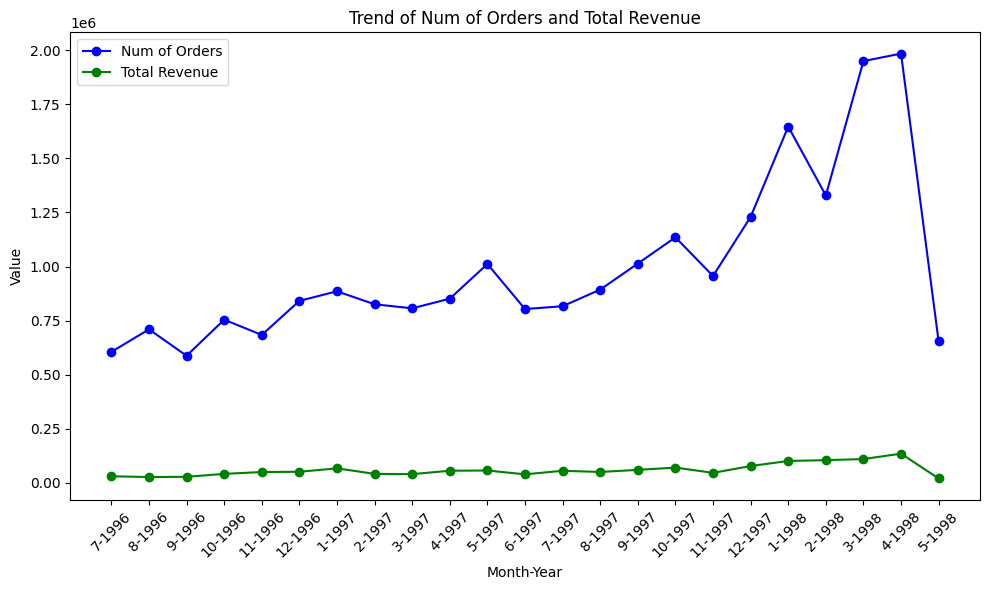

In [75]:
# Combine OrderMonth and OrderYear for x-axis labels
orders_month_year['MonthYear'] = orders_month_year['OrderMonth'].astype(str) + '-' + orders_month_year['OrderYear'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(orders_month_year['MonthYear'], orders_month_year['NumofOrders'], label='Num of Orders', marker='o', linestyle='-', color='blue')
plt.plot(orders_month_year['MonthYear'], orders_month_year['TotalRevenue'], label='Total Revenue', marker='o', linestyle='-', color='green')

plt.xlabel('Month-Year')
plt.ylabel('Value')
plt.title('Trend of Num of Orders and Total Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Active Customer Analysis
   * Extract the names of customers who placed more than 10 orders in the past year, sorted by the number of orders in descending order.

In [18]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT C.[CompanyName], COUNT(O.[OrderID]) AS Order_Count
        FROM [dbo].[Customers] C
        JOIN [dbo].[Orders] O ON C.[CustomerID]=O.[CustomerID]
        WHERE YEAR(O.[OrderDate]) = 1997
        GROUP BY [CompanyName]
        HAVING COUNT(O.[OrderID]) > 10
        ORDER BY Order_Count DESC;
        """
    
cust_orders_sql = read_data_from_sql(conn, query)
cust_orders = pd.DataFrame(cust_orders_sql)
if cust_orders is not None:
        
       print(cust_orders)
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

          CompanyName  Order_Count
0  Save-a-lot Markets           17
1        Ernst Handel           15
2          QUICK-Stop           14
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3275460845.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [81]:
cust_orders = pd.DataFrame(cust_orders_sql)
cust_orders

,CompanyName,Order_Count
0,Save-a-lot Markets,17
1,Ernst Handel,15
2,QUICK-Stop,14


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\2369863945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompanyName', y='Order_Count', data=cust_orders, palette='Blues_d')


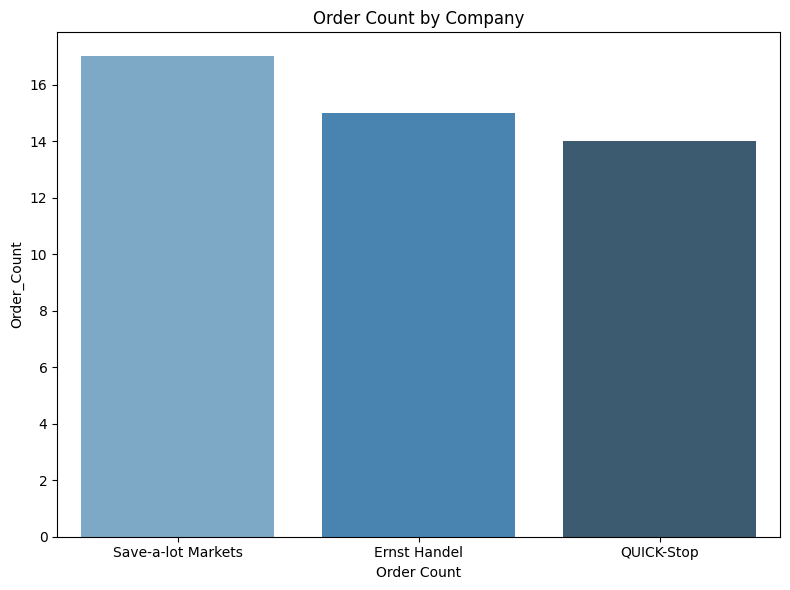

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CompanyName', y='Order_Count', data=cust_orders, palette='Blues_d')
plt.xlabel('Order Count')
plt.title('Order Count by Company')
plt.tight_layout()
plt.show()


3. Low Stock Analysis
   * Identify products with available stock (UnitsInStock) below the average reorder level (ReorderLevel) across all products.

In [21]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT [ProductName], [UnitsInStock] AS AvailableStock
        FROM [dbo].[Products]
        WHERE [UnitsInStock] < (SELECT AVG([ReorderLevel]) FROM [dbo].[Products])
        """
    
low_stock_products_sql = pd.read_sql(query, conn)
low_stock_products = pd.DataFrame(low_stock_products_sql)
if low_stock_products_sql is not None:
       print(low_stock_products_sql.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

                  ProductName  AvailableStock
0      Chef Anton's Gumbo Mix               0
1  Northwoods Cranberry Sauce               6
2                Alice Mutton               0
3         Sir Rodney's Scones               3
4     Thüringer Rostbratwurst               0
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\779930931.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_stock_products_sql = pd.read_sql(query, conn)


In [22]:
low_stock_products = pd.DataFrame(low_stock_products_sql)
low_stock_products

,ProductName,AvailableStock
0,Chef Anton's Gumbo Mix,0
1,Northwoods Cranberry Sauce,6
2,Alice Mutton,0
3,Sir Rodney's Scones,3
4,Thüringer Rostbratwurst,0
5,Nord-Ost Matjeshering,10
6,Gorgonzola Telino,0
7,Mascarpone Fabioli,9
8,Gravad lax,11
9,Rogede sild,5


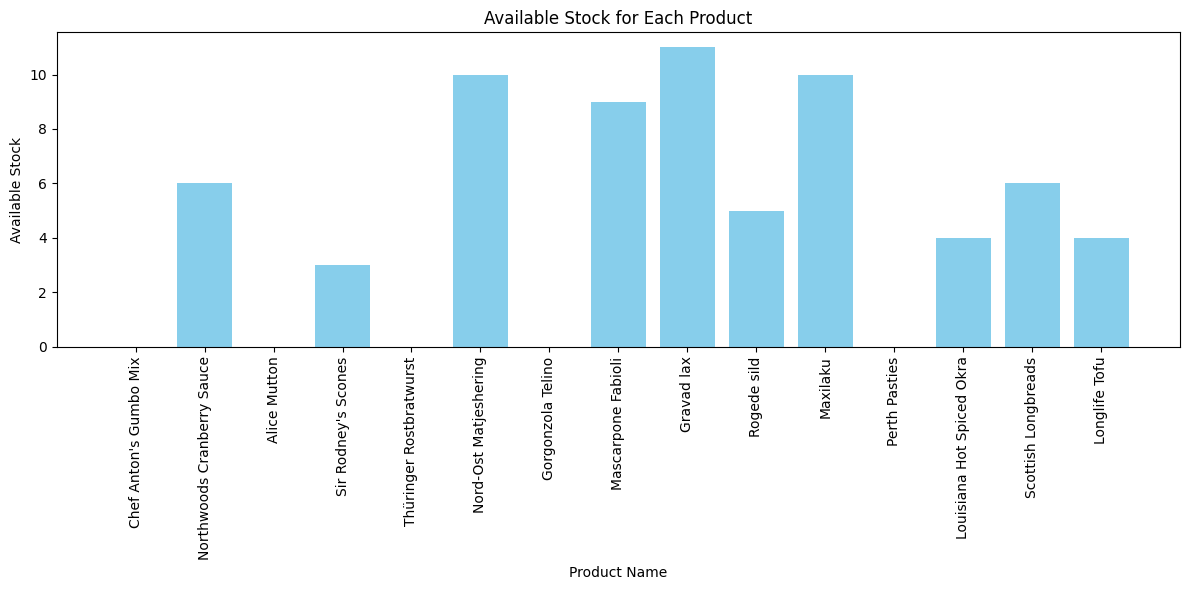

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(low_stock_products['ProductName'], low_stock_products['AvailableStock'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Available Stock')
plt.title('Available Stock for Each Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

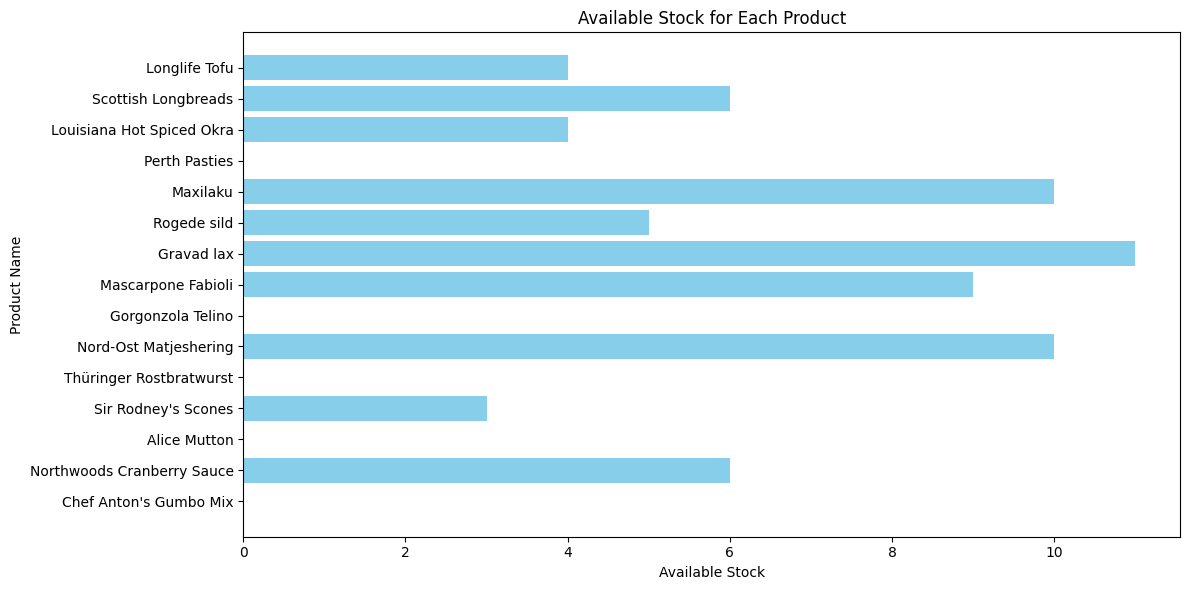

In [27]:
# Plotting the Horizontal Bar Chart
plt.figure(figsize=(12, 6))
plt.barh(low_stock_products['ProductName'], low_stock_products['AvailableStock'], color='skyblue')
plt.xlabel('Available Stock')
plt.ylabel('Product Name')
plt.title('Available Stock for Each Product')
plt.tight_layout()
plt.show()


4. Supplier Analysis by Location
    * Fetch a list of suppliers along with the number of products each supplies, sorted by geographical location.

In [39]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT S.[CompanyName], COUNT(P.[ProductID]) AS ProductCount, S.[Country], S.[Region], S.[City]
        FROM [dbo].[Suppliers] S
        JOIN [dbo].[Products] P ON S.[SupplierID] = P.[SupplierID]
        GROUP BY S.[CompanyName], S.[Country], S.[Region], S.[City]
        ORDER BY S.[Country], S.[Region], S.[City];
        """
    
sup_prod_loc_sql = pd.read_sql(query, conn)
sup_prod_loc = pd.DataFrame(sup_prod_loc_sql)
if sup_prod_loc is not None:
       print(sup_prod_loc_sql.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\2801420278.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



                 CompanyName  ProductCount    Country    Region           City
0                G'day, Mate             3  Australia       NSW         Sydney
1              Pavlova, Ltd.             5  Australia  Victoria      Melbourne
2  Refrescos Americanas LTDA             1     Brazil      None      Sao Paulo
3                  Ma Maison             2     Canada    Québec       Montréal
4           Forêts d'érables             2     Canada    Québec  Ste-Hyacinthe
تم إغلاق الاتصال بنجاح.


In [31]:
sup_prod_loc = pd.DataFrame(sup_prod_loc_sql)
sup_prod_loc

,CompanyName,ProductCount,Country,Region,City
0,"G'day, Mate",3,Australia,NSW,Sydney
1,"Pavlova, Ltd.",5,Australia,Victoria,Melbourne
2,Refrescos Americanas LTDA,1,Brazil,None,Sao Paulo
3,Ma Maison,2,Canada,Québec,Montréal
4,Forêts d'érables,2,Canada,Québec,Ste-Hyacinthe
5,Lyngbysild,2,Denmark,None,Lyngby
6,Karkki Oy,3,Finland,None,Lappeenranta
7,Gai pâturage,2,France,None,Annecy
8,Escargots Nouveaux,1,France,None,Montceau
9,Aux joyeux ecclésiastiques,2,France,None,Paris


In [34]:
sup_prod_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CompanyName   29 non-null     object
 1   ProductCount  29 non-null     int64 
 2   Country       29 non-null     object
 3   Region        9 non-null      object
 4   City          29 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [38]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from geopy.geocoders import Nominatim
import time

# Initialize the Geolocator
geolocator = Nominatim(user_agent="supplier_locator")

# Function to fetch latitude and longitude from city names
def get_lat_lon(city_name):
    try:
        location = geolocator.geocode(city_name, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error with city {city_name}: {e}")
        return None, None

# Adding the Lat/Lon columns to the dataframe
sup_prod_loc[['Lat', 'Lon']] = sup_prod_loc['City'].apply(lambda city: pd.Series(get_lat_lon(city)))

# Display the updated dataframe with Lat/Lon
sup_prod_loc

,CompanyName,ProductCount,Country,Region,City,Lat,Lon
0,"G'day, Mate",3,Australia,NSW,Sydney,-33.869844,151.208285
1,"Pavlova, Ltd.",5,Australia,Victoria,Melbourne,-37.814245,144.963173
2,Refrescos Americanas LTDA,1,Brazil,None,Sao Paulo,-23.550651,-46.633382
3,Ma Maison,2,Canada,Québec,Montréal,45.503182,-73.569806
4,Forêts d'érables,2,Canada,Québec,Ste-Hyacinthe,14.832855,-61.056232
5,Lyngbysild,2,Denmark,None,Lyngby,55.771865,12.505141
6,Karkki Oy,3,Finland,None,Lappeenranta,61.058371,28.186274
7,Gai pâturage,2,France,None,Annecy,45.899235,6.128885
8,Escargots Nouveaux,1,France,None,Montceau,45.587142,5.375782
9,Aux joyeux ecclésiastiques,2,France,None,Paris,48.853495,2.348391


In [42]:
# Plotting on a map with Plotly
fig = px.scatter_geo(sup_prod_loc,
                     lat='Lat', lon='Lon',
                     size='ProductCount',  # Size of markers based on product count
                     color='Country',  # Color based on country
                     hover_name='CompanyName',  # Show company names on hover
                     title="Companies and Product Counts by Location",
                     projection="natural earth")  # Natural Earth map projection
fig.show()

In [44]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import folium

# Create a base map centered around the world
m = folium.Map(location=[20, 0], zoom_start=2)  # Centering on the world map

# Add company locations to the map
for index, row in sup_prod_loc.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=row['ProductCount'],  # Size of the circle based on product count
        color='blue',  # Color of the marker
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['CompanyName']}\nProduct Count: {row['ProductCount']}\nCountry: {row['Country']}"
    ).add_to(m)

# Save the map as an HTML file or display it inline
m.save('company_map.html')  # Saves the map to an HTML file
m  # Display the map in a Jupyter notebook or web-based Python environment

In [32]:
import plotly.express as px

# Treemap visualization
fig = px.treemap(sup_prod_loc, path=['Country', 'City', 'CompanyName'], values='ProductCount', title="Product Count by Country, City, and Company")
fig.show()


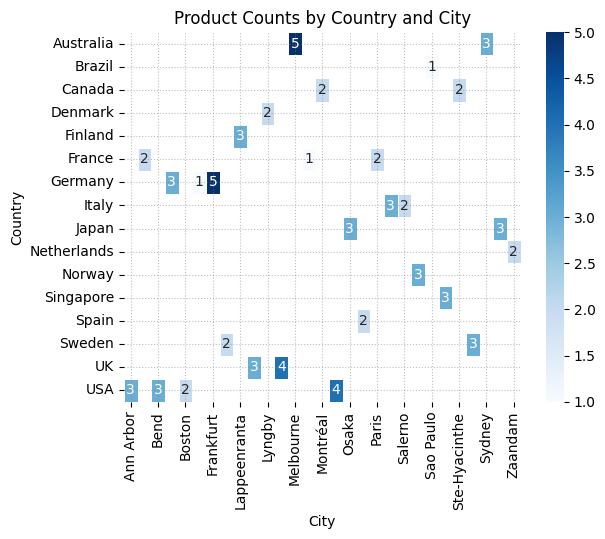

In [50]:
# Pivot table to create a heatmap-friendly structure
heatmap_data = sup_prod_loc.pivot_table(values='ProductCount', index='Country', columns='City', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.0f', linewidths=.5)
heatmap_data = heatmap_data.fillna(0)  # Replace NaN with 0
plt.title('Product Counts by Country and City')
plt.grid(True, linestyle=':', color='gray', alpha=0.5)  # Dotted gray grid with faded transparency
plt.show()


 5. Shipping Delays
    * Retrieve orders that were delayed in shipping by more than 5 days from the order date, displaying the name of the shipping company (ShipperName).

In [51]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT O.[OrderID], SH.[CompanyName]
        FROM [dbo].[Orders] AS O
        JOIN [dbo].[Shippers] AS SH ON O.[ShipVia] = SH.[ShipperID]
        WHERE ([ShippedDate] - [OrderDate]) > 5;
        """
    
ship_delay_sql = pd.read_sql(query, conn)
ship_delay = pd.DataFrame(ship_delay_sql)
if ship_delay is not None:
       print(ship_delay.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

   OrderID       CompanyName
0    10248  Federal Shipping
1    10251    Speedy Express
2    10253    United Package
3    10254    United Package
4    10257  Federal Shipping
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3054431646.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [52]:
ship_delay

,OrderID,CompanyName
0,10248,Federal Shipping
1,10251,Speedy Express
2,10253,United Package
3,10254,United Package
4,10257,Federal Shipping
...,...,...
530,11048,Federal Shipping
531,11049,Speedy Express
532,11050,United Package
533,11055,United Package


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\152581908.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




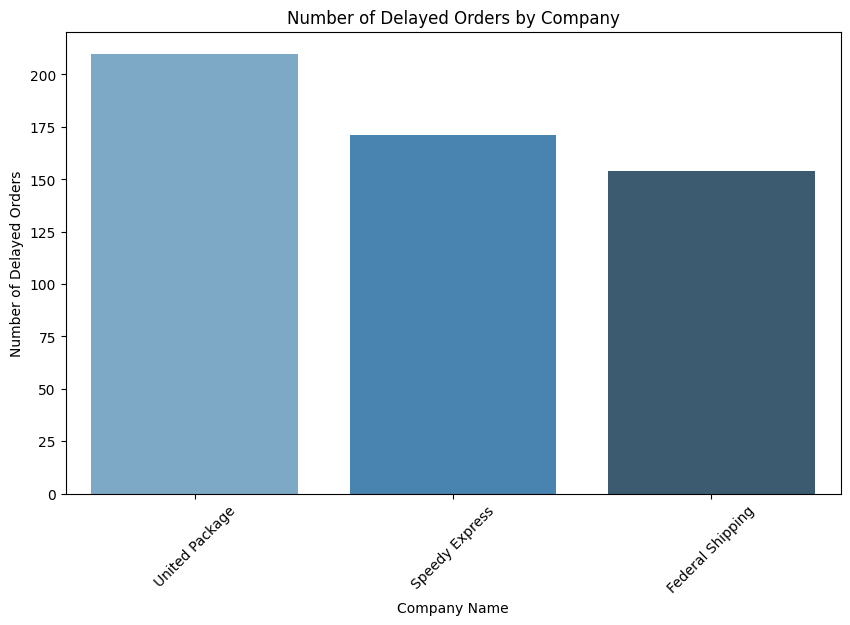

In [57]:
# Count the orders per company
company_order_counts = ship_delay['CompanyName'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=company_order_counts.index, y=company_order_counts.values, palette='Blues_d')
plt.title('Number of Delayed Orders by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Delayed Orders')
plt.xticks(rotation=45)
plt.show()

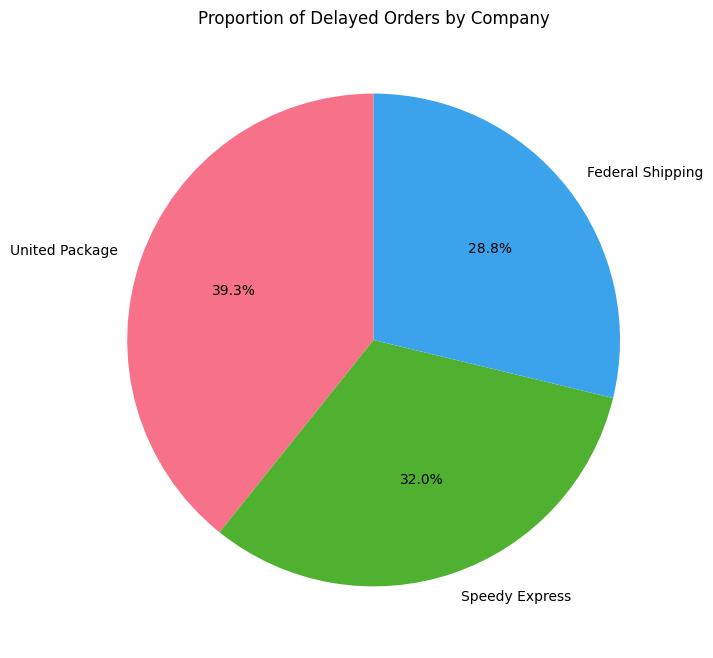

In [68]:


# Create a pie chart to show the proportion of delays by company
company_order_counts = ship_delay['CompanyName'].value_counts()

# Use a different color palette, e.g., "Set2" (you can change to other available palettes like "coolwarm", "viridis", etc.)
plt.figure(figsize=(8,8))
company_order_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("husl", len(company_order_counts)), startangle=90)
plt.title('Proportion of Delayed Orders by Company')
plt.ylabel('')  # Hide the y-label
plt.show()

6. Profitability by Category
    * Calculate the average profitability (selling price - purchase cost) for each product category (CategoryName)

In [53]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT C.[CategoryName], AVG(P.[UnitPrice] - OD.[UnitPrice]) AS AvgProfit
        FROM [dbo].[Products] P
        JOIN [dbo].[Categories] C ON P.[CategoryID] = C.[CategoryID]
        JOIN [dbo].[Order Details] OD ON P.[ProductID] = OD.[ProductID]
        GROUP BY [CategoryName];
        """
    
profit_by_categ_sql = pd.read_sql(query, conn)
profit_by_categ = pd.DataFrame(profit_by_categ_sql)
if profit_by_categ is not None:
       print(profit_by_categ.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3337589546.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



   CategoryName  AvgProfit
0       Seafood     1.0504
1  Meat/Poultry     2.9835
2    Condiments     1.3050
3   Confections     1.5682
4       Produce     2.1827
تم إغلاق الاتصال بنجاح.


In [55]:
profit_by_categ

,CategoryName,AvgProfit
0,Seafood,1.0504
1,Meat/Poultry,2.9835
2,Condiments,1.3050
3,Confections,1.5682
4,Produce,2.1827
5,Dairy Products,1.9046
6,Beverages,1.9488
7,Grains/Cereals,1.4219


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3420004729.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




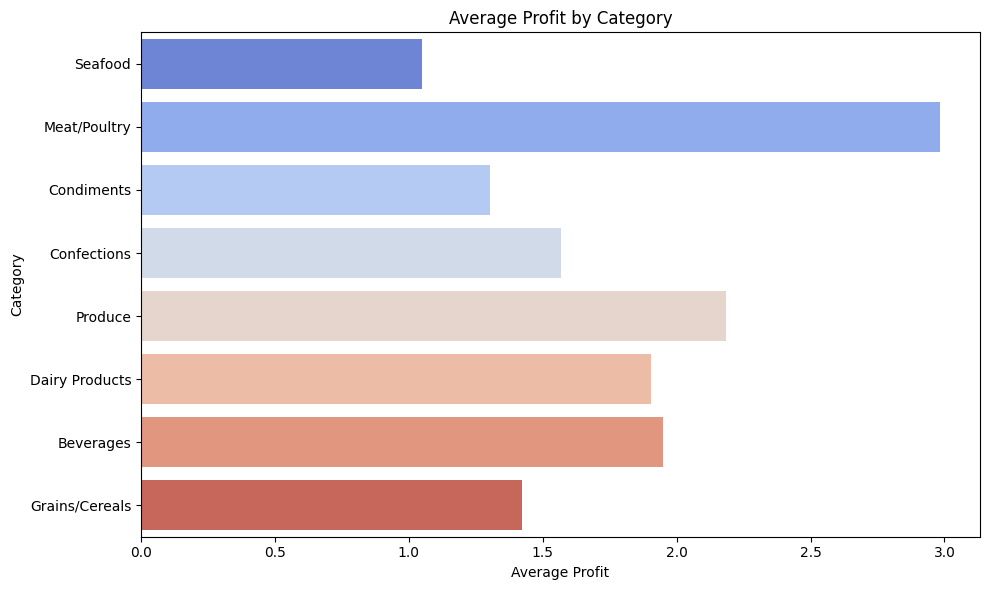

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgProfit', y='CategoryName', data=profit_by_categ, palette='coolwarm')
plt.xlabel('Average Profit')
plt.ylabel('Category')
plt.title('Average Profit by Category')
plt.tight_layout()
plt.show()

7. Top Customers
    * Extract a list of the top 5 customers by total sales, including their names and sales value.

In [70]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT TOP(5) C.[CompanyName], SUM(OD.[UnitPrice]*OD.[Quantity]) AS TotalSales
        FROM [dbo].[Customers] AS C
        JOIN [dbo].[Orders] AS O ON C.[CustomerID] = O.[CustomerID]
        JOIN [dbo].[Order Details] AS OD ON O.[OrderID] = OD.[OrderID]
        GROUP BY C.[CompanyName]
        ORDER BY TotalSales DESC;
        """
    
top_cust_sql = pd.read_sql(query, conn)
top_cust = pd.DataFrame(top_cust_sql)
if top_cust is not None:
       print(top_cust.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\1571489601.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



                    CompanyName  TotalSales
0                    QUICK-Stop   117483.39
1            Save-a-lot Markets   115673.39
2                  Ernst Handel   113236.68
3  Hungry Owl All-Night Grocers    57317.39
4    Rattlesnake Canyon Grocery    52245.90
تم إغلاق الاتصال بنجاح.


In [71]:
top_cust

,CompanyName,TotalSales
0,QUICK-Stop,117483.39
1,Save-a-lot Markets,115673.39
2,Ernst Handel,113236.68
3,Hungry Owl All-Night Grocers,57317.39
4,Rattlesnake Canyon Grocery,52245.90


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\1873700673.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




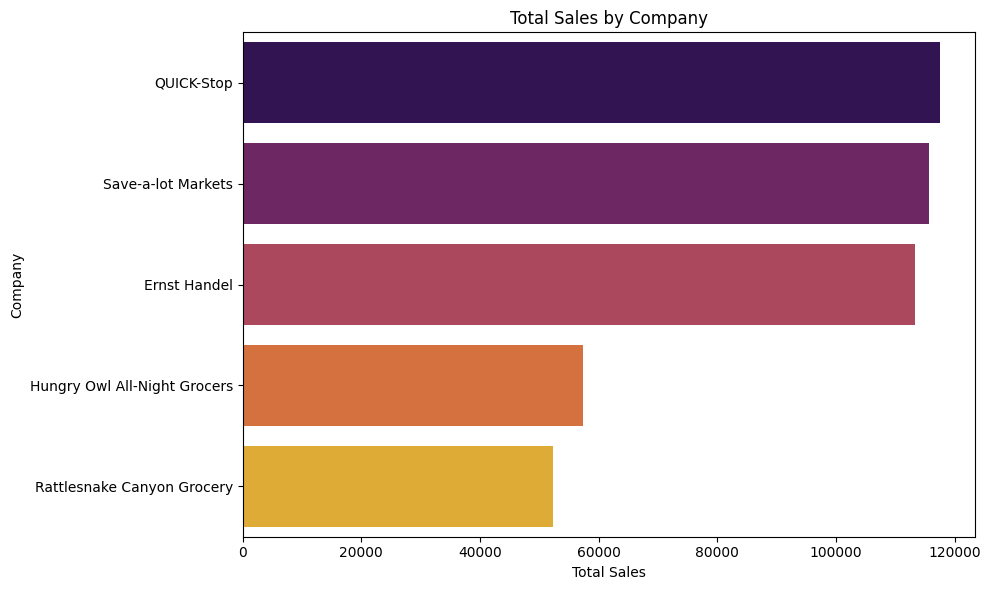

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='CompanyName', data=top_cust, palette='inferno')
plt.xlabel('Total Sales')
plt.ylabel('Company')
plt.title('Total Sales by Company')
plt.tight_layout()
plt.show()

8. Discount Analysis
    * Identify the percentage of discounts given in orders for each customer and display those who received
      an average discount greater than 10%.

In [77]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT O.[CustomerID], AVG(OD.[Discount]*100) AS AvgDiscount
        FROM [dbo].[Order Details] AS OD
        JOIN [dbo].[Orders] AS O ON OD.[OrderID] = O.[OrderID]
        GROUP BY O.[CustomerID]
        HAVING AVG(OD.[Discount]*100) > 10;
        """
    
cust_disc_sql = pd.read_sql(query, conn)
cust_disc = pd.DataFrame(cust_disc_sql)
if cust_disc is not None:
       print(cust_disc.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

  CustomerID  AvgDiscount
0      SIMOB    14.000000
1      LAMAI    12.580645
2      LETSS    11.000000
3      HUNGO    11.363636
4      BOLID    11.666667
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3878581048.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [78]:
cust_disc

,CustomerID,AvgDiscount
0,SIMOB,14.000000
1,LAMAI,12.580645
2,LETSS,11.000000
3,HUNGO,11.363636
4,BOLID,11.666667


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\962352500.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




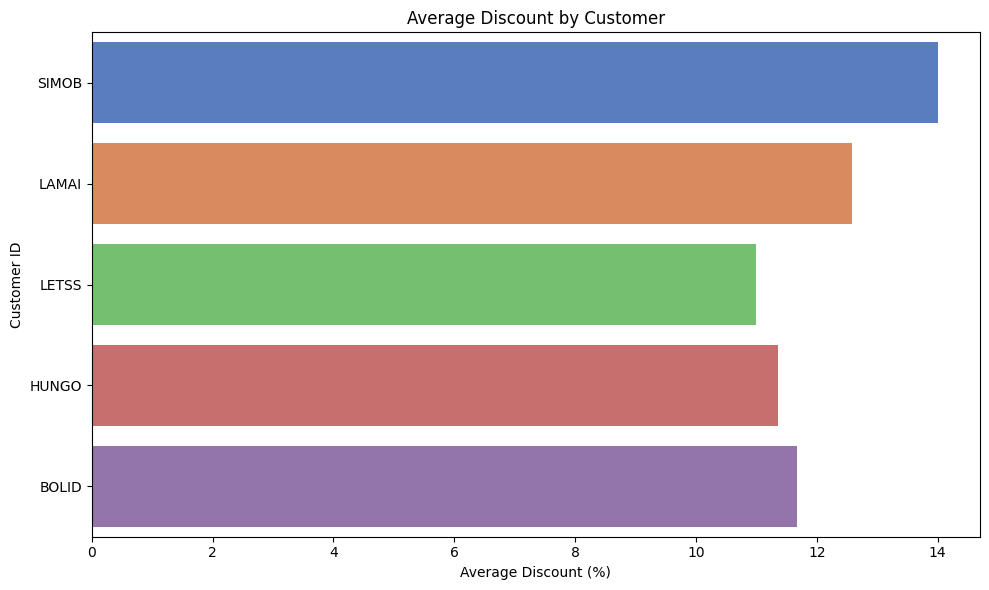

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgDiscount', y='CustomerID', data=cust_disc, palette='muted')
plt.xlabel('Average Discount (%)')
plt.ylabel('Customer ID')
plt.title('Average Discount by Customer')
plt.tight_layout()
plt.show()

9. Order Revenue by Employee
    * Calculate the total revenue generated by each employee based on the orders they handled.

In [92]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT (E.[FirstName]+' '+E.[LastName]) AS EmpName ,SUM(OD.[UnitPrice]*OD.[Quantity]) AS OrderAmount
        FROM [dbo].[Employees] AS E
        JOIN [dbo].[Orders] AS O ON E.[EmployeeID] = O.[EmployeeID]
        JOIN [dbo].[Order Details] AS OD ON O.[OrderID] = OD.[OrderID]
        GROUP BY E.[FirstName]+' '+E.[LastName];
        """
    
order_rev_emp_sql = pd.read_sql(query, conn)
order_rev_emp = pd.DataFrame(order_rev_emp_sql)
if order_rev_emp is not None:
       print(order_rev_emp.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

           EmpName  OrderAmount
0    Nancy Davolio    202143.71
1    Andrew Fuller    177749.26
2   Michael Suyama     78198.10
3  Janet Leverling    213051.30
4   Anne Dodsworth     82964.00
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3109173414.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [93]:
order_rev_emp

,EmpName,OrderAmount
0,Nancy Davolio,202143.71
1,Andrew Fuller,177749.26
2,Michael Suyama,78198.10
3,Janet Leverling,213051.30
4,Anne Dodsworth,82964.00
5,Laura Callahan,133301.03
6,Robert King,141295.99
7,Margaret Peacock,250187.45
8,Steven Buchanan,75567.75


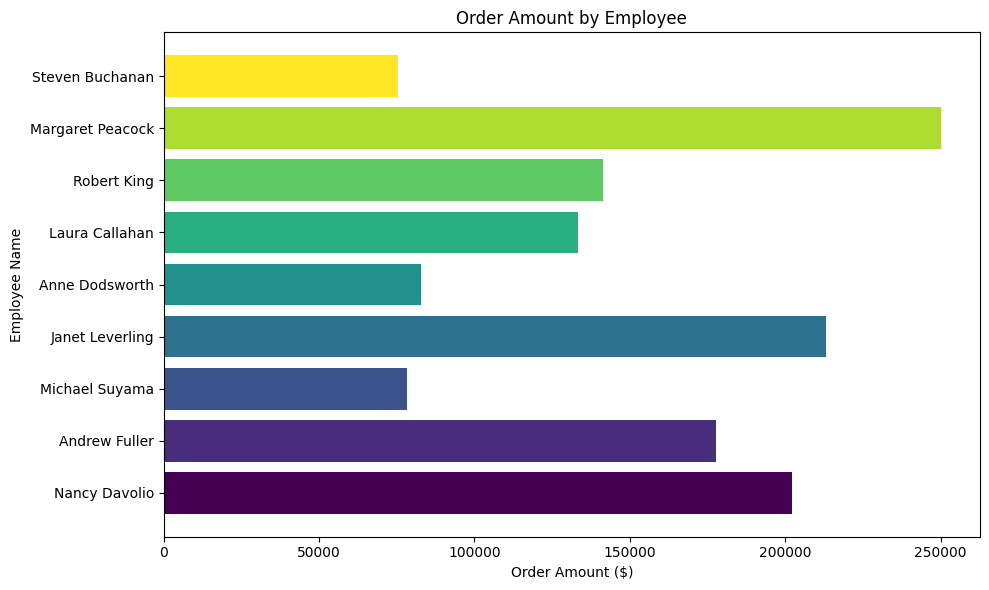

In [112]:
# Data from the order_rev_emp DataFrame
emp_names = ['Nancy Davolio', 'Andrew Fuller', 'Michael Suyama', 'Janet Leverling', 'Anne Dodsworth', 
             'Laura Callahan', 'Robert King', 'Margaret Peacock', 'Steven Buchanan']
order_amounts = [202143.71, 177749.26, 78198.10, 213051.30, 82964.00, 
                 133301.03, 141295.99, 250187.45, 75567.75]
# Generate a colormap using a palette
colors = plt.cm.viridis(np.linspace(0, 1, len(emp_names)))

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(emp_names, order_amounts, color=colors)
plt.xlabel('Order Amount ($)')
plt.ylabel('Employee Name')
plt.title('Order Amount by Employee')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


10. Best-Selling Products
    * Extract the names of the top 5 best-selling products and the quantity sold for each.

In [113]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT TOP(5) P.[ProductName], SUM(OD.[Quantity]) AS TotalQuantity
        FROM [dbo].[Products] AS P
        JOIN [dbo].[Order Details] AS OD ON P.[ProductID] = OD.[ProductID]
        GROUP BY P.[ProductName]
        ORDER BY TotalQuantity DESC;
        """
    
best_sell_prod_sql = pd.read_sql(query, conn)
best_sell_prod = pd.DataFrame(best_sell_prod_sql)
if best_sell_prod is not None:
       print(best_sell_prod.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

              ProductName  TotalQuantity
0       Camembert Pierrot           1577
1    Raclette Courdavault           1496
2       Gorgonzola Telino           1397
3  Gnocchi di nonna Alice           1263
4                 Pavlova           1158
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\3278188560.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [114]:
best_sell_prod

,ProductName,TotalQuantity
0,Camembert Pierrot,1577
1,Raclette Courdavault,1496
2,Gorgonzola Telino,1397
3,Gnocchi di nonna Alice,1263
4,Pavlova,1158


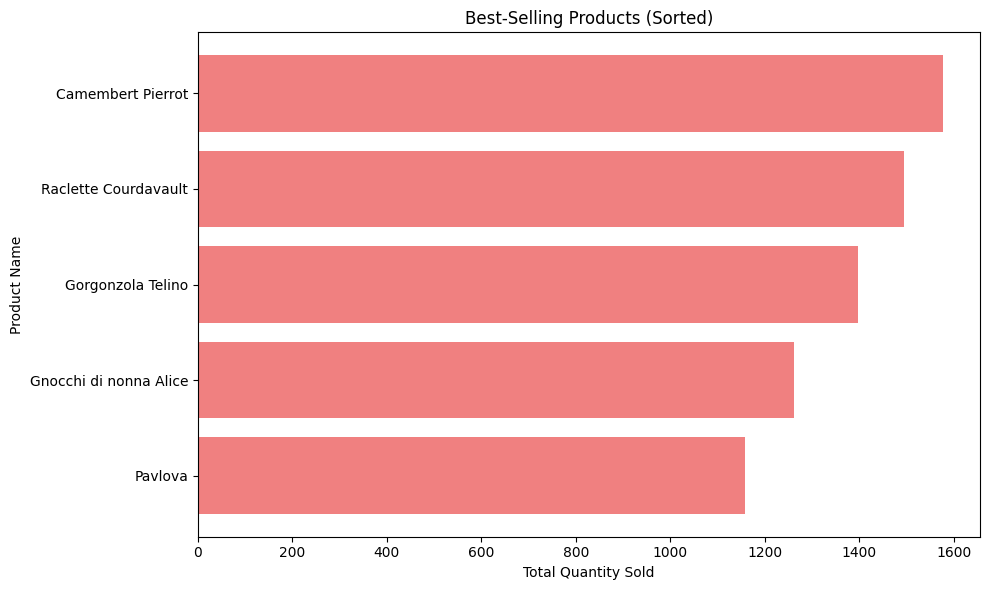

In [120]:
# Sort by total quantity
best_sell_prod_sorted = best_sell_prod.sort_values(by='TotalQuantity', ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(best_sell_prod_sorted['ProductName'], best_sell_prod_sorted['TotalQuantity'], color='lightcoral')

# Add labels and title
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.title('Best-Selling Products (Sorted)')
plt.tight_layout()

# Show the plot
plt.show()

11. Unshipped Orders
    * Retrieve orders that have not been shipped yet, displaying the customer's name and the order date.

In [121]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT O.[OrderID], C.[CompanyName], O.[OrderDate]
        FROM [dbo].[Orders] AS O
        JOIN [dbo].[Customers] AS C ON O.[CustomerID] = C.[CustomerID]
        WHERE [ShippedDate] IS NULL;
        """
    
unship_order_sql = pd.read_sql(query, conn)
unship_order = pd.DataFrame(unship_order_sql)
if unship_order is not None:
       print(unship_order.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

   OrderID              CompanyName  OrderDate
0    11008             Ernst Handel 1998-04-08
1    11019            Rancho grande 1998-04-13
2    11039         LINO-Delicateses 1998-04-21
3    11040  Great Lakes Food Market 1998-04-22
4    11045    Bottom-Dollar Markets 1998-04-23
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\2538569414.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [122]:
unship_order

,OrderID,CompanyName,OrderDate
0,11008,Ernst Handel,1998-04-08
1,11019,Rancho grande,1998-04-13
2,11039,LINO-Delicateses,1998-04-21
3,11040,Great Lakes Food Market,1998-04-22
4,11045,Bottom-Dollar Markets,1998-04-23
5,11051,La maison d'Asie,1998-04-27
6,11054,Cactus Comidas para llevar,1998-04-28
7,11058,Blauer See Delikatessen,1998-04-29
8,11059,Ricardo Adocicados,1998-04-29
9,11061,Great Lakes Food Market,1998-04-30


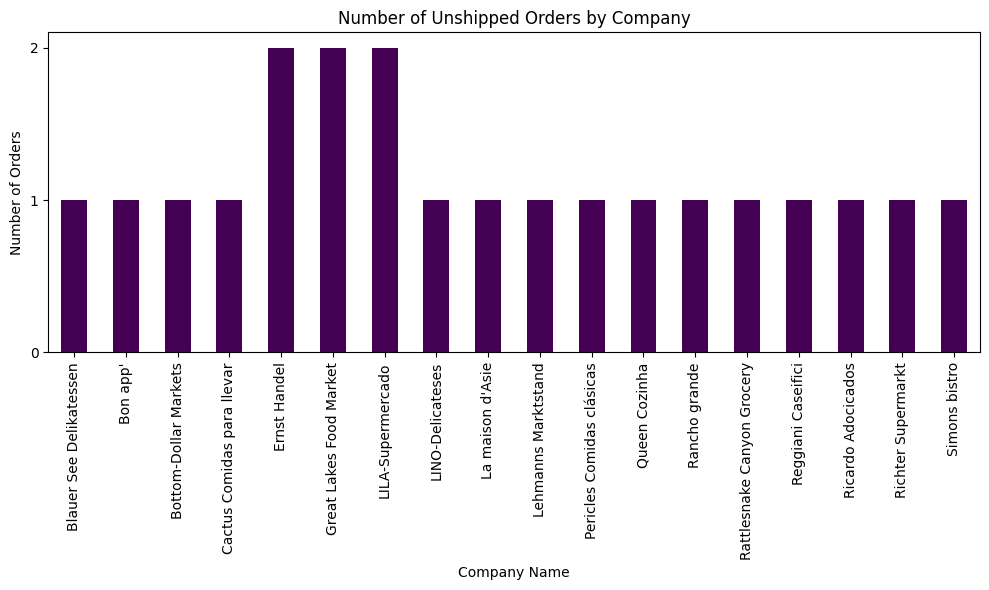

In [153]:
from matplotlib.ticker import MaxNLocator

# Count orders per company
orders_per_company = unship_order.groupby('CompanyName').size()

# Plotting the bar chart with a colormap
plt.figure(figsize=(10, 6))
orders_per_company.plot(kind='bar', cmap='viridis')  # Using colormap 'viridis'

# Add labels and title
plt.title('Number of Unshipped Orders by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)

# Ensure the y-axis has no decimals
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


12. Sales by Region
    * Calculate the total sales for each city within each country.

In [123]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT O.[ShipCity], O.[ShipCountry], SUM(OD.[UnitPrice]*OD.[Quantity]) AS TotalSales
        FROM [dbo].[Orders] AS O
        JOIN [dbo].[Order Details] AS OD ON O.[OrderID] = OD.[OrderID]
        GROUP BY O.[ShipCity], O.[ShipCountry];
        """
    
sales_by_region_sql = pd.read_sql(query, conn)
sales_by_region = pd.DataFrame(sales_by_region_sql)
if sales_by_region is not None:
       print(sales_by_region.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

       ShipCity ShipCountry  TotalSales
0  Buenos Aires   Argentina     8119.10
1          Graz     Austria   113236.68
2      Salzburg     Austria    26259.95
3     Bruxelles     Belgium    10430.58
4     Charleroi     Belgium    24704.40
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\1295778593.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [124]:
sales_by_region

,ShipCity,ShipCountry,TotalSales
0,Buenos Aires,Argentina,8119.10
1,Graz,Austria,113236.68
2,Salzburg,Austria,26259.95
3,Bruxelles,Belgium,10430.58
4,Charleroi,Belgium,24704.40
...,...,...,...
65,Walla Walla,USA,357.00
66,Barquisimeto,Venezuela,17825.06
67,Caracas,Venezuela,1488.70
68,I. de Margarita,Venezuela,17889.55


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\105705394.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




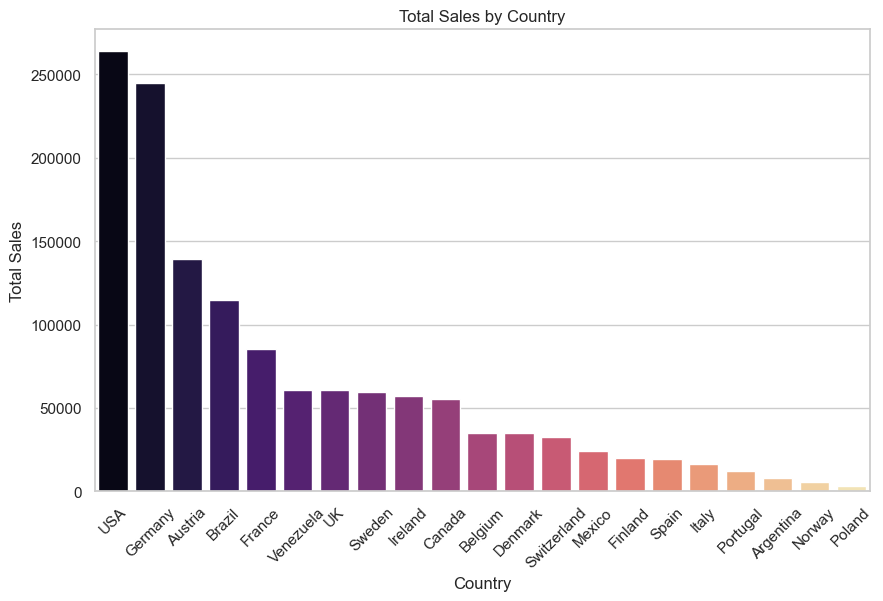

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\105705394.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




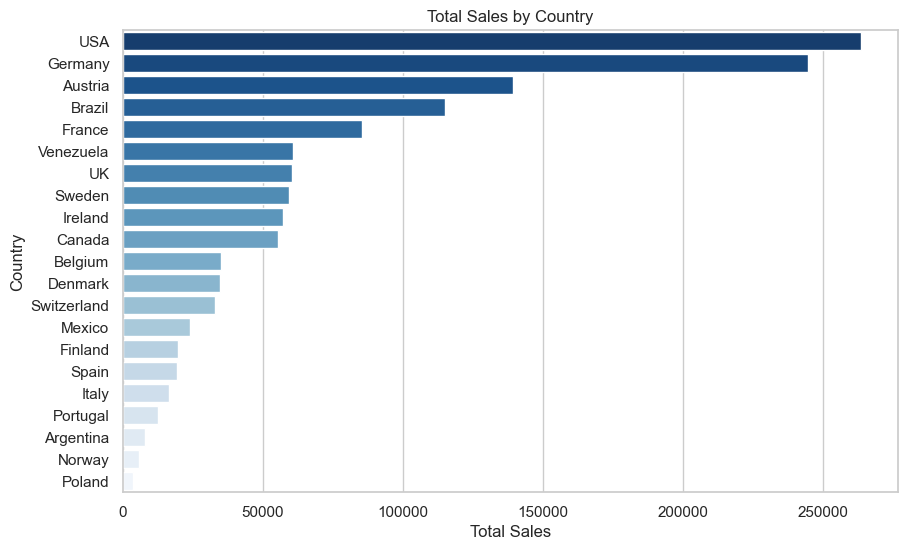

In [176]:
# Ensure required modules are installed
try:
    import micropip
    await micropip.install(["pandas", "matplotlib", "seaborn"])
except ModuleNotFoundError:
    pass

# Aggregate sales by country
sales_by_region_grouped = sales_by_region.groupby("ShipCountry")["TotalSales"].sum().reset_index()

# Sort by sales
sales_by_region_grouped = sales_by_region_grouped.sort_values(by="TotalSales", ascending=False)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Vertical bar chart
def plot_vertical_bar_chart():
    plt.figure(figsize=(10, 6))
    sns.barplot(x="ShipCountry", y="TotalSales", data=sales_by_region_grouped, palette="magma")
    plt.title("Total Sales by Country")
    plt.xlabel("Country")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

# Horizontal bar chart
def plot_horizontal_bar_chart():
    plt.figure(figsize=(10, 6))
    sns.barplot(x="TotalSales", y="ShipCountry", data=sales_by_region_grouped, palette="Blues_r")
    plt.title("Total Sales by Country")
    plt.xlabel("Total Sales")
    plt.ylabel("Country")
    plt.show()

# Call functions to display the charts
plot_vertical_bar_chart()
plot_horizontal_bar_chart()


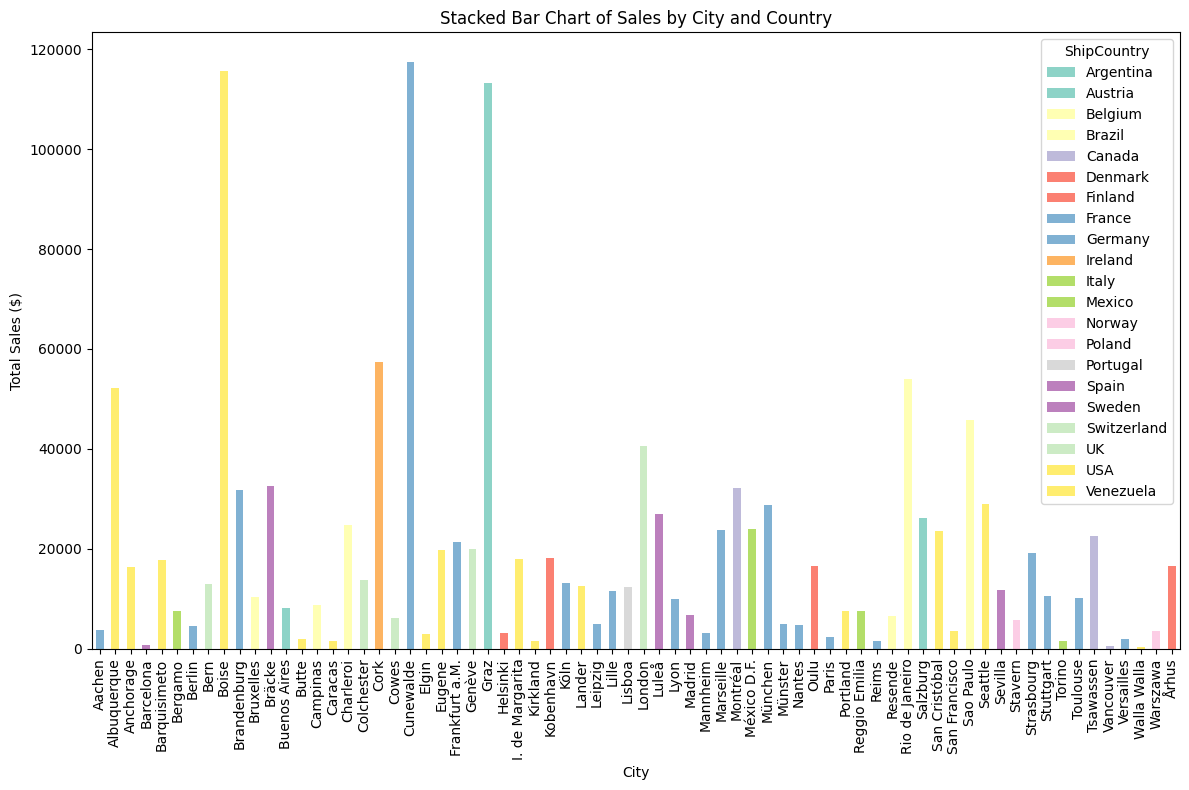

In [160]:
# Pivot the data for stacked bar chart
sales_pivot = sales_by_region.pivot_table(index='ShipCity', columns='ShipCountry', values='TotalSales', aggfunc='sum')

# Plotting the stacked bar chart
sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')

# Add labels and title
plt.title('Stacked Bar Chart of Sales by City and Country')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


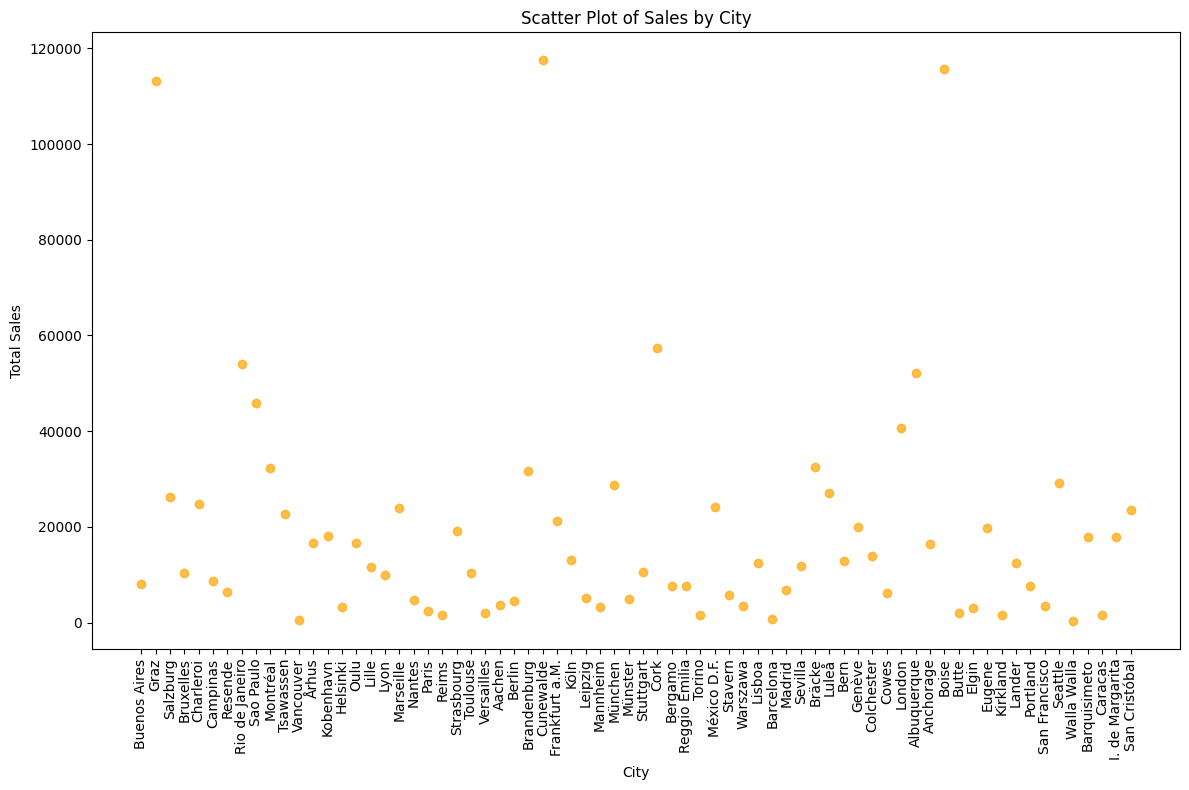

In [166]:
# Plotting the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(sales_by_region['ShipCity'], sales_by_region['TotalSales'], c='orange', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


13. Subqueries for Supplier Analysis
    * Identify suppliers offering products sold at prices higher than the average product price in the database.

In [131]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT S.[CompanyName], P.[ProductName], P.[UnitPrice]
        FROM [dbo].[Suppliers] AS S
        JOIN [dbo].[Products] AS P ON S.[SupplierID] = P.[SupplierID]
        WHERE P.[UnitPrice] > (SELECT AVG([UnitPrice]) FROM [dbo].[Products]);
        """
    
sup_high_prod_sql = pd.read_sql(query, conn)
sup_high_prod = pd.DataFrame(sup_high_prod_sql)
if sup_high_prod is not None:
       print(sup_high_prod.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

                          CompanyName                      ProductName  \
0           Grandma Kelly's Homestead  Uncle Bob's Organic Dried Pears   
1           Grandma Kelly's Homestead       Northwoods Cranberry Sauce   
2                       Tokyo Traders                  Mishi Kobe Niku   
3                       Tokyo Traders                            Ikura   
4  Cooperativa de Quesos 'Las Cabras'        Queso Manchego La Pastora   

   UnitPrice  
0       30.0  
1       40.0  
2       97.0  
3       31.0  
4       38.0  
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\2147259365.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [132]:
sup_high_prod

,CompanyName,ProductName,UnitPrice
0,Grandma Kelly's Homestead,Uncle Bob's Organic Dried Pears,30.00
1,Grandma Kelly's Homestead,Northwoods Cranberry Sauce,40.00
2,Tokyo Traders,Mishi Kobe Niku,97.00
3,Tokyo Traders,Ikura,31.00
4,Cooperativa de Quesos 'Las Cabras',Queso Manchego La Pastora,38.00
5,"Pavlova, Ltd.",Alice Mutton,39.00
6,"Pavlova, Ltd.",Carnarvon Tigers,62.50
7,"Specialty Biscuits, Ltd.",Sir Rodney's Marmalade,81.00
8,Heli Süßwaren GmbH & Co. KG,Gumbär Gummibärchen,31.23
9,Heli Süßwaren GmbH & Co. KG,Schoggi Schokolade,43.90


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\4271710940.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




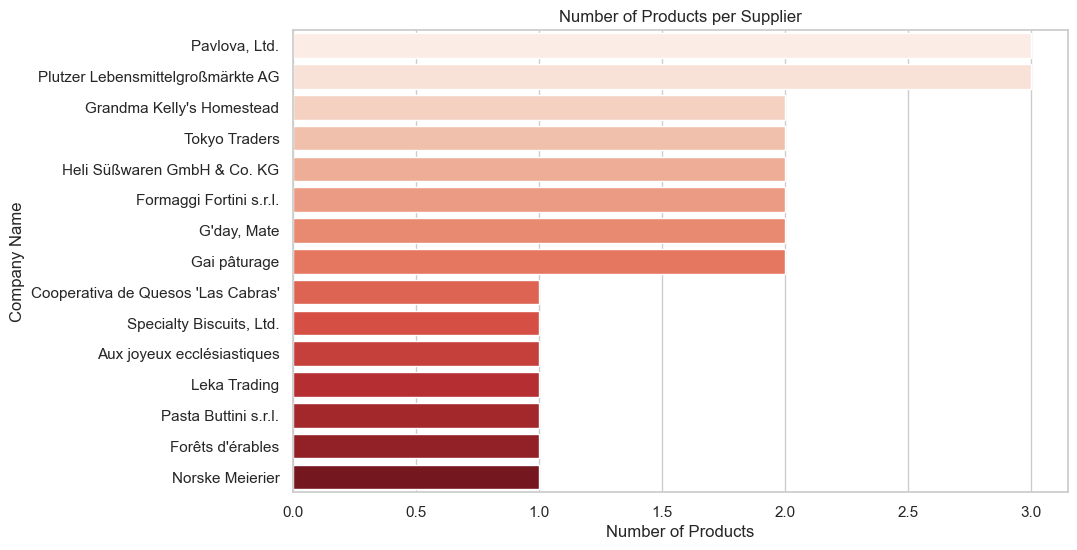

In [194]:
# Bar chart for number of products per company
plt.figure(figsize=(10, 6))
product_counts = sup_high_prod["CompanyName"].value_counts()
sns.barplot(y=product_counts.index, x=product_counts.values, palette="Reds")
plt.title("Number of Products per Supplier")
plt.ylabel("Company Name")
plt.xlabel("Number of Products")
plt.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\2246346379.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




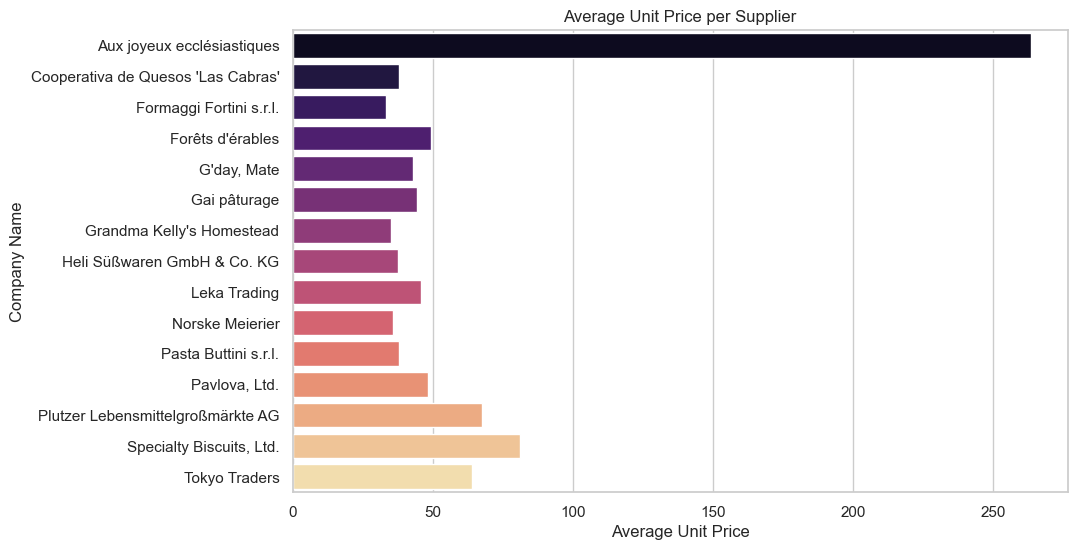

In [196]:
# Bar chart for average unit price per company
plt.figure(figsize=(10, 6))
avg_prices = sup_high_prod.groupby("CompanyName")["UnitPrice"].mean().reset_index()
sns.barplot(y="CompanyName", x="UnitPrice", data=avg_prices, palette="magma")
plt.title("Average Unit Price per Supplier")
plt.ylabel("Company Name")
plt.xlabel("Average Unit Price")
plt.show()

14. Unsold Products
    * List the names of products that have never been sold in any order.

In [133]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT P.[ProductName]
        FROM [dbo].[Products] AS P
        LEFT OUTER JOIN [dbo].[Order Details] AS OD ON P.[ProductID] = OD.[ProductID]
        WHERE OD.[OrderID] IS NULL;
        """
    
un_sold_prod_sql = pd.read_sql(query, conn)
un_sold_prod = pd.DataFrame(un_sold_prod_sql)
if un_sold_prod is not None:
       print(un_sold_prod.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

Empty DataFrame
Columns: [ProductName]
Index: []
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\1116300878.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [197]:
un_sold_prod

,ProductName


15. Orders by Product Category
    * Calculate the number of orders and total revenue for each product category (CategoryName), sorted by revenue in descending order.

In [198]:
if __name__ == "__main__":
    conn = connect_to_sql_server()

query = """
        SELECT C.[CategoryName], SUM(OD.[OrderID]) AS NumofOrders, SUM(OD.[UnitPrice]*OD.[Quantity]) AS TotalRevenue
        FROM [dbo].[Categories] AS C
        JOIN [dbo].[Products] AS P ON C.[CategoryID] = P.[CategoryID]
        JOIN [dbo].[Order Details] AS OD ON P.[ProductID] = OD.[ProductID]
        GROUP BY C.[CategoryName]
        ORDER BY TotalRevenue DESC;
        """
    
order_prod_catg_sql = pd.read_sql(query, conn)
order_prod_catg = pd.DataFrame(order_prod_catg_sql)
if order_prod_catg is not None:
       print(order_prod_catg.head())
else:
        print("لم يتم العثور على بيانات.")
    
close_connection(conn)

     CategoryName  NumofOrders  TotalRevenue
0       Beverages      4312144     286526.95
1  Dairy Products      3894474     251330.50
2    Meat/Poultry      1839680     178188.80
3     Confections      3557446     177099.10
4         Seafood      3523066     141623.09
تم إغلاق الاتصال بنجاح.


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_36532\2701407500.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [199]:
order_prod_catg

,CategoryName,NumofOrders,TotalRevenue
0,Beverages,4312144,286526.95
1,Dairy Products,3894474,251330.50
2,Meat/Poultry,1839680,178188.80
3,Confections,3557446,177099.10
4,Seafood,3523066,141623.09
5,Condiments,2303505,113694.75
6,Produce,1450501,105268.60
7,Grains/Cereals,2090139,100726.80


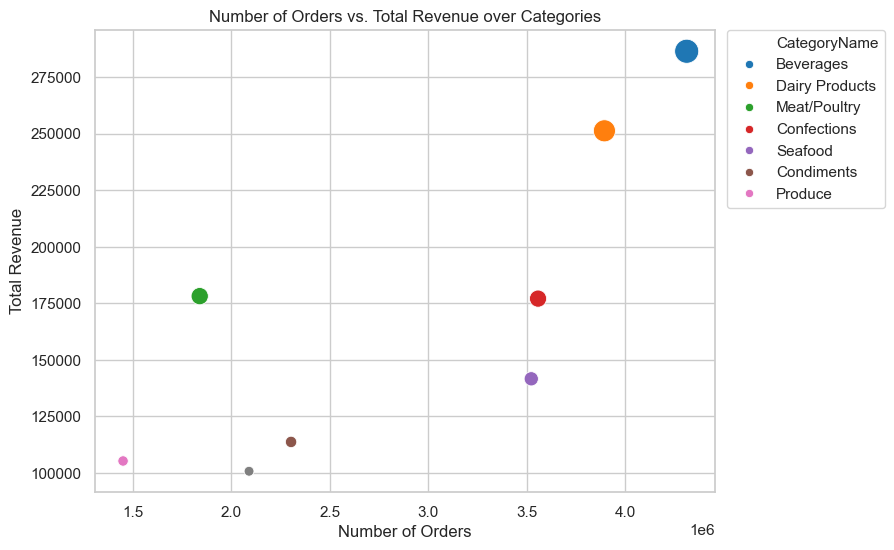

In [213]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x="NumofOrders", y="TotalRevenue", hue="CategoryName", size="TotalRevenue", sizes=(50, 300), palette="tab10", data=order_prod_catg)

plt.title("Number of Orders vs. Total Revenue over Categories")
plt.xlabel("Number of Orders")
plt.ylabel("Total Revenue")

# Move legend outside the plot and exclude 'TotalRevenue' from the legend
handles, labels = scatter.get_legend_handles_labels()
handles = handles[:len(order_prod_catg['CategoryName'].unique())]  # Only keep the handles for 'CategoryName'
labels = labels[:len(order_prod_catg['CategoryName'].unique())]  # Only keep the labels for 'CategoryName'

plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()



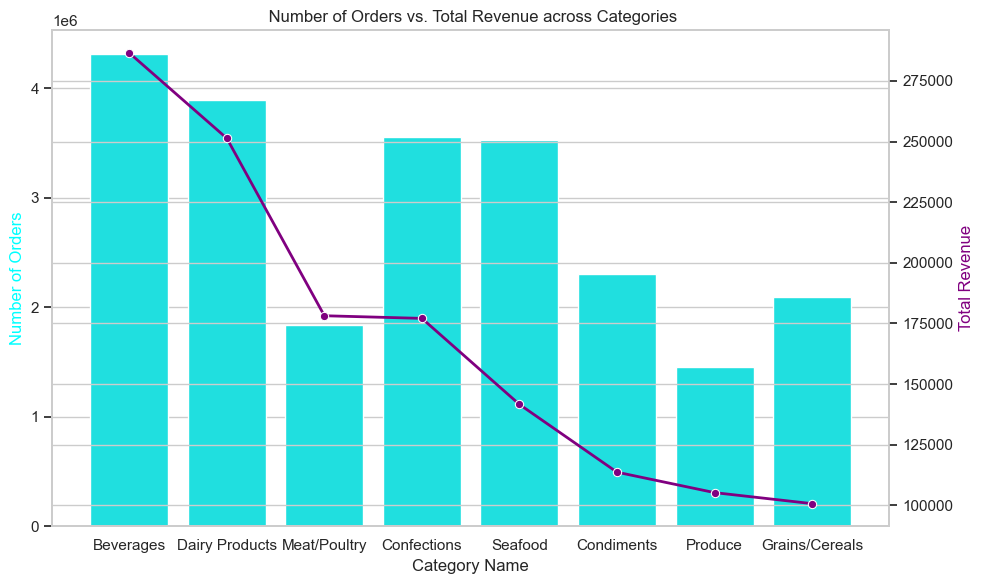

In [231]:
# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot clustered columns for 'NumofOrders'
sns.barplot(x="CategoryName", y="NumofOrders", data=order_prod_catg, ax=ax1, color='cyan')

# Create a second y-axis to plot the line for 'TotalRevenue'
ax2 = ax1.twinx()
sns.lineplot(x="CategoryName", y="TotalRevenue", data=order_prod_catg, ax=ax2, color='purple', marker='o', linewidth=2)

# Set titles and labels
ax1.set_title(' Number of Orders vs. Total Revenue across Categories')
ax1.set_xlabel('Category Name')
ax1.set_ylabel('Number of Orders', color='cyan')
ax2.set_ylabel('Total Revenue', color='purple')

# Rotate the category names for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()